In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving heart_disease1.xlsx to heart_disease1.xlsx


In [3]:
heart=pd.read_excel('heart_disease1.xlsx',sheet_name='heart_disease-r')

In [4]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,NaN,downsloping,fixed defect,4


In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    bool   
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(2), float64(1), int64(5), object(5)
memory usage: 79.9+ KB


In [7]:
heart['cp'].unique()

array(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'],
      dtype=object)

In [8]:
heart['trestbps'].unique()

array([145, 135, 140, 118, 110, 160, 130, 155, 170, 150, 125, 120, 142,
       100, 102, 112, 146, 138, 134, 122, 136, 108, 115, 104, 128, 106,
       156, 129, 124, 126, 132, 105, 152, 148,  94, 180, 178, 101, 172,
        80, 114, 190, 113, 154, 175, 133, 131, 181, 188, 193, 153, 179,
       143,  90,  96, 163, 161, 196, 107, 167, 174, 158, 192, 185, 144,
       169,  95,  92, 200, 127, 121, 166, 177, 165, 117, 116, 184,  97,
       186, 164, 123, 151,   0, 137, 182])

In [9]:
heart['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [10]:
heart['slope'].unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

In [11]:
heart['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

In [12]:
heart.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [13]:
heart.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [14]:
print('The % of missing values in oldpeak is', (heart['oldpeak'].isnull().sum()/len(heart))*100)

The % of missing values in oldpeak is 6.828193832599119


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')


<Axes: >

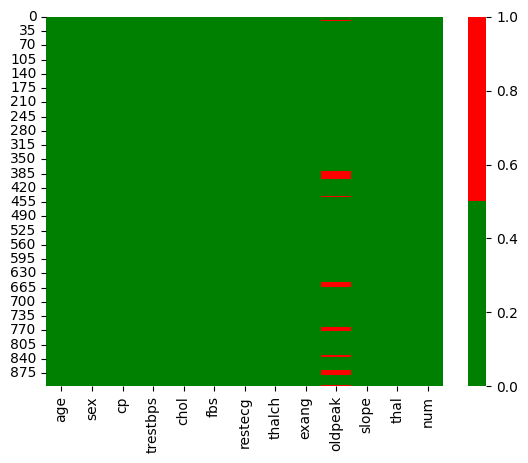

In [15]:
cols=heart.columns
print(cols)
colours=['Green','Red'] # specify the colours - Red is missing. Green is not missing.
sns.heatmap(heart[cols].isnull(), cmap=sns.color_palette(colours))

In [16]:
#To check if 'oldpeak' column data is skewed
heart['oldpeak'].skew()    #this is positive or right skewed

1.0217090718797428

<Axes: >

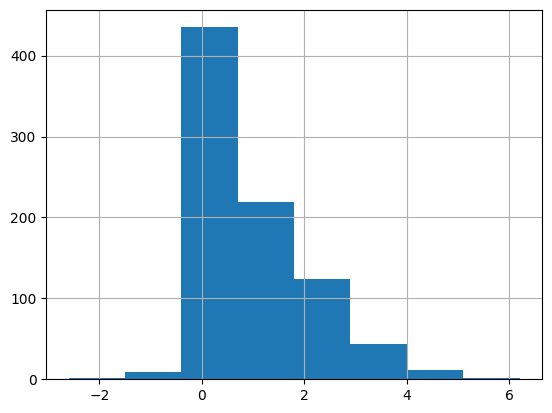

In [17]:
heart['oldpeak'].hist(bins=8)

In [18]:
oldpeak_median=heart['oldpeak'].median()
print(oldpeak_median)
oldpeak_mean=heart['oldpeak'].mean()
print(oldpeak_mean)

0.5
0.8912529550827422


In [19]:
heart['oldpeak_Full']=heart['oldpeak'].fillna(oldpeak_median)
heart[['oldpeak_Full','oldpeak']]

,oldpeak_Full,oldpeak
0,2.3,2.3
1,0.0,0.0
2,0.4,0.4
3,0.0,0.0
4,1.5,1.5
...,...,...
903,1.5,1.5
904,3.0,3.0
905,2.5,2.5
906,0.5,NaN


In [20]:
heart['oldpeak']=heart['oldpeak'].fillna(oldpeak_median)

In [21]:
heart.isnull().sum()

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalch          0
exang           0
oldpeak         0
slope           0
thal            0
num             0
oldpeak_Full    0
dtype: int64

In [22]:
heart.drop('oldpeak_Full',axis=1,inplace=True)

In [23]:
heart[0:2]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0


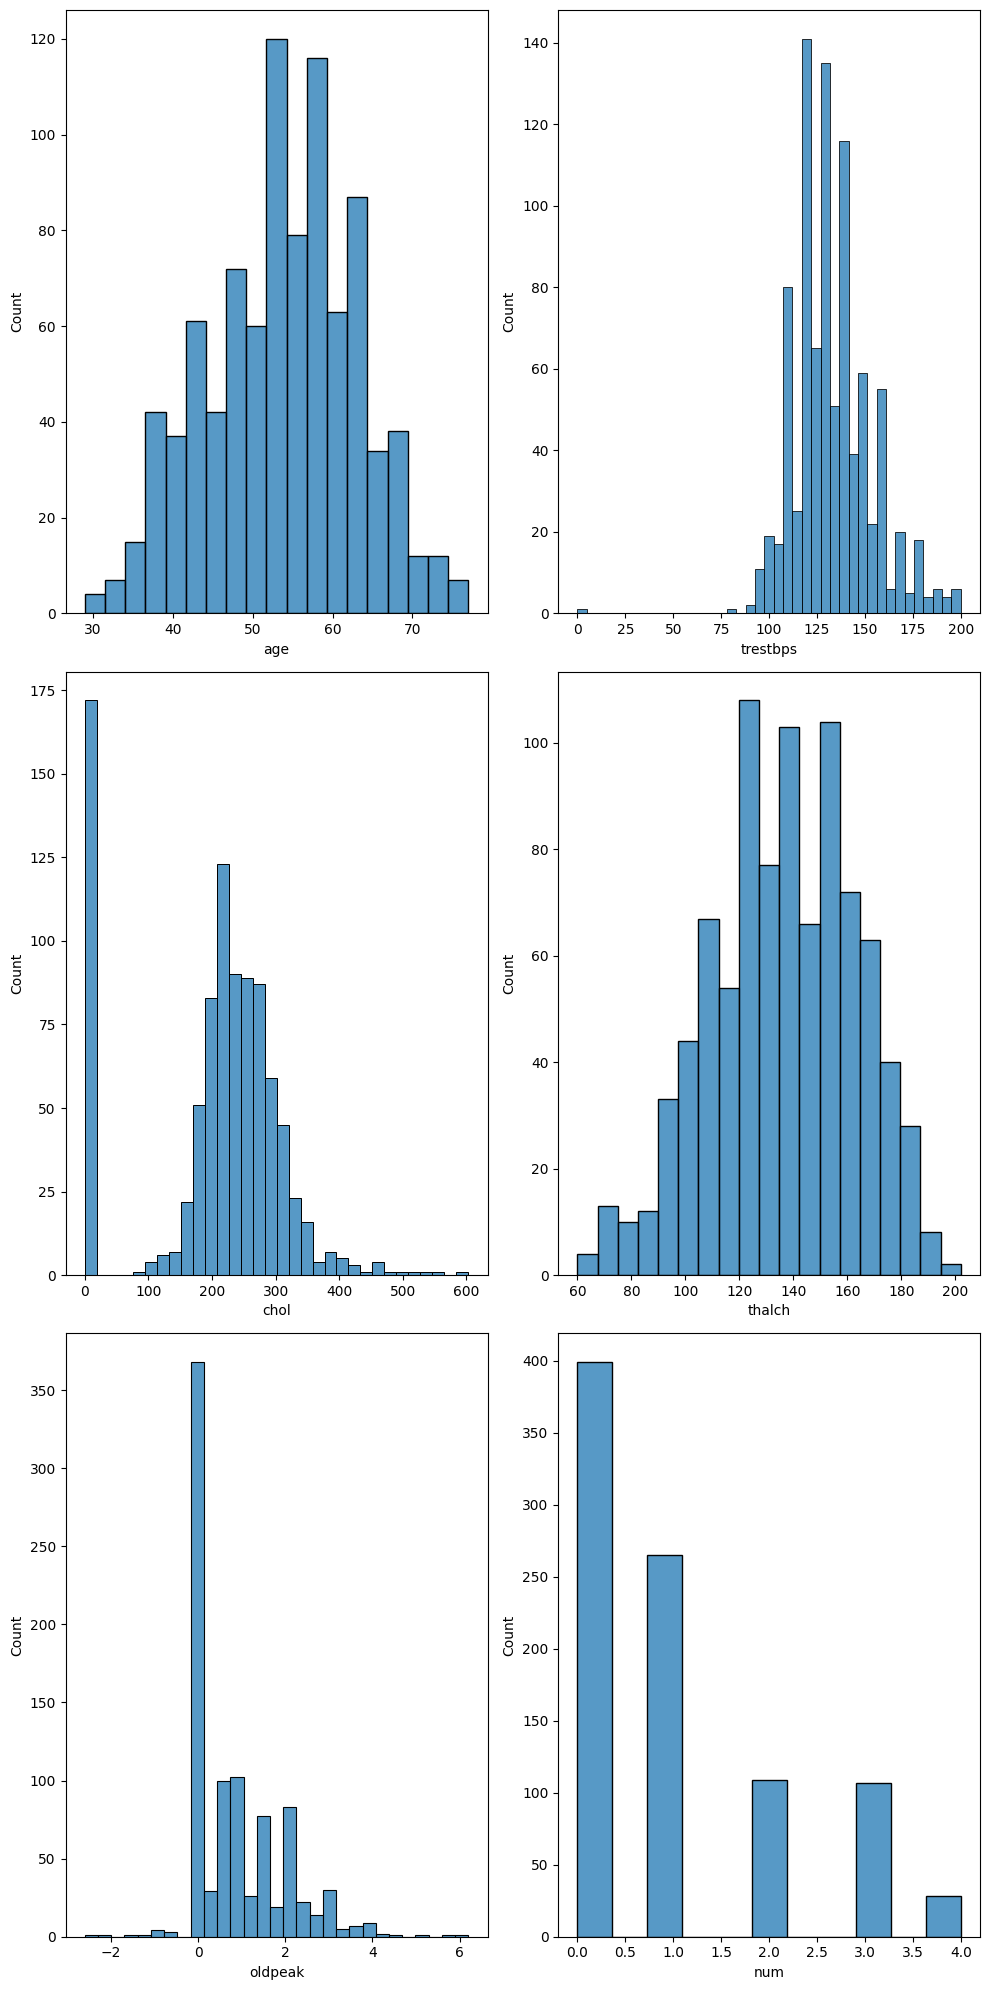

In [24]:
# PLOTTING HISTOGRAM ==> HERE WE CAN SEE OUTLIERS
fig, ax = plt.subplots(3, 2, figsize=(10, 20))

sns.histplot(heart['age'], ax = ax[0,0])
sns.histplot(heart['trestbps'], ax = ax[0,1])
sns.histplot(heart['chol'], ax = ax[1,0])
sns.histplot(heart['thalch'], ax = ax[1,1])
sns.histplot(heart['oldpeak'], ax = ax[2,0])
sns.histplot(heart['num'], ax = ax[2,1])

plt.tight_layout()

Outliers calculation for age
Axes(0.125,0.11;0.775x0.77)
count    908.000000
mean      53.791850
std        9.158031
min       29.000000
25%       47.750000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64
count    908.000000
mean      53.791850
std        9.158031
min       29.000000
25%       47.750000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64
Quartile 1 :  47.75
Quartile 3 :  60.0
Inter-Quartile Range :  12.25
Upper Limit :  78.375
Lower Limit :  29.375
     age   sex               cp  trestbps  chol    fbs         restecg  \
134   29  Male  atypical angina       130   204  False  lv hypertrophy   

     thalch  exang  oldpeak      slope    thal  num  
134     202  False      0.0  upsloping  normal    0  
__________________________________________________________
Outliers calculation for trestbps
Axes(0.125,0.11;0.775x0.77)
count    908.000000
mean     133.430617
std       20.401608
min        0.000000


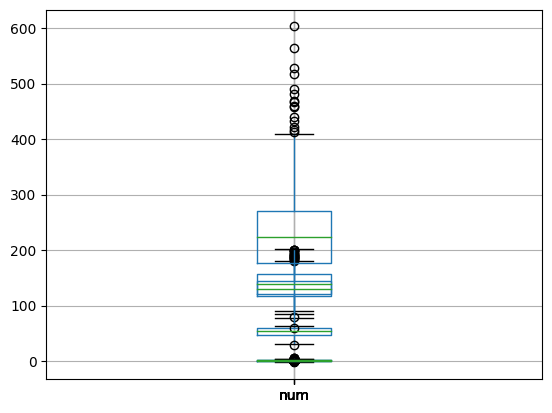

In [25]:
#Outlier Detection for all columns
Num_Columns= ['age','trestbps','chol','thalch','oldpeak','num']
for i in Num_Columns:
  column_name = i
  print("Outliers calculation for", i)
  print(heart.boxplot(column=[column_name],grid=True))
  print(heart[column_name].describe())
#Quartile 1
  print(heart[column_name].describe())
  Q1=heart[column_name].quantile(0.25)
  print('Quartile 1 : ',Q1)
#Quartile 3
  Q3=heart[column_name].quantile(0.75)
  print('Quartile 3 : ',Q3)
#Interquartile Range
  IQR= Q3 - Q1
  print('Inter-Quartile Range : ',IQR)
#Upper Limit
  UL = Q3 + (1.5 * IQR)
  print('Upper Limit : ',UL)
#Lower Limit
  LL = Q1 - (1.5 * IQR)
  print('Lower Limit : ', LL)
  Outliers=heart[(heart[column_name] > UL) | (heart[column_name] < LL)]
  print(Outliers)
  print('__________________________________________________________')

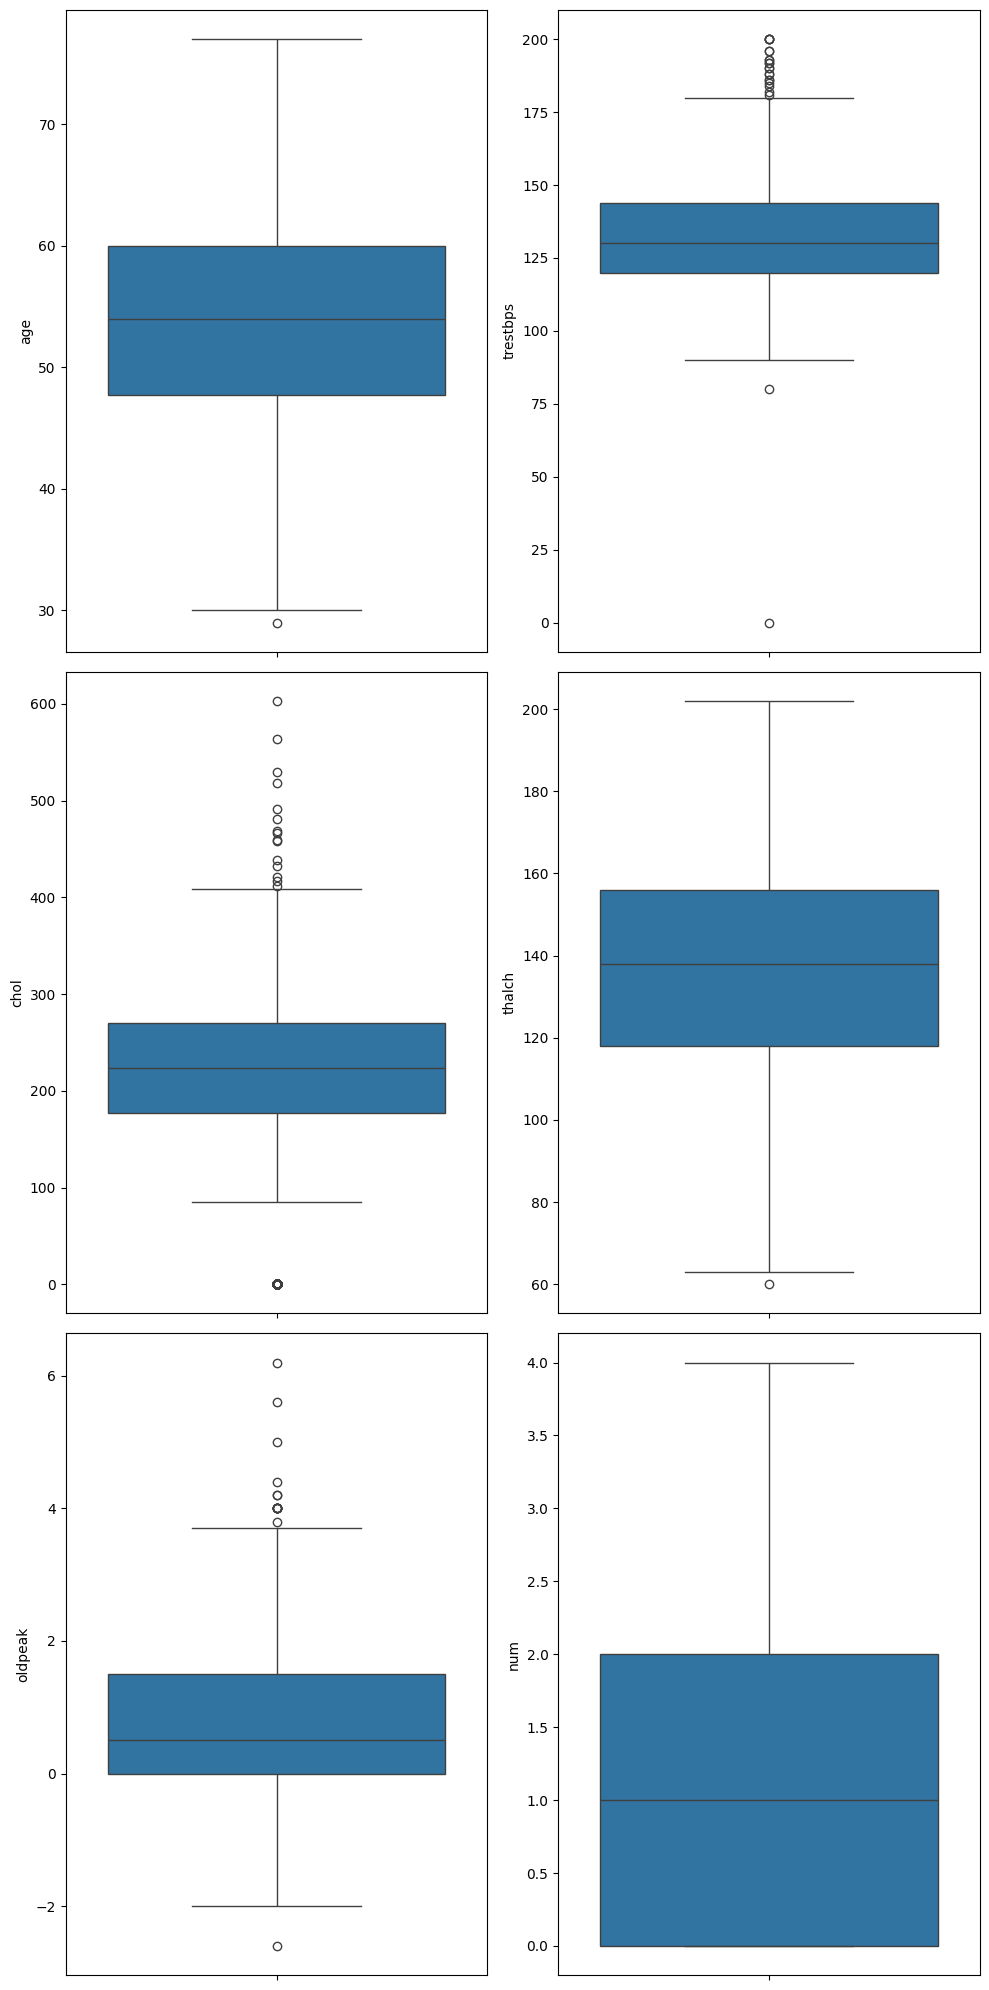

In [26]:
# PLOTTING BOXPLOT ==> HERE WE CAN SEE OUTLIERS
fig, ax = plt.subplots(3, 2, figsize=(10, 20))

sns.boxplot(heart['age'], ax = ax[0,0])
sns.boxplot(heart['trestbps'], ax = ax[0,1])
sns.boxplot(heart['chol'], ax = ax[1,0])
sns.boxplot(heart['thalch'], ax = ax[1,1])
sns.boxplot(heart['oldpeak'], ax = ax[2,0])
sns.boxplot(heart['num'], ax = ax[2,1])

plt.tight_layout()

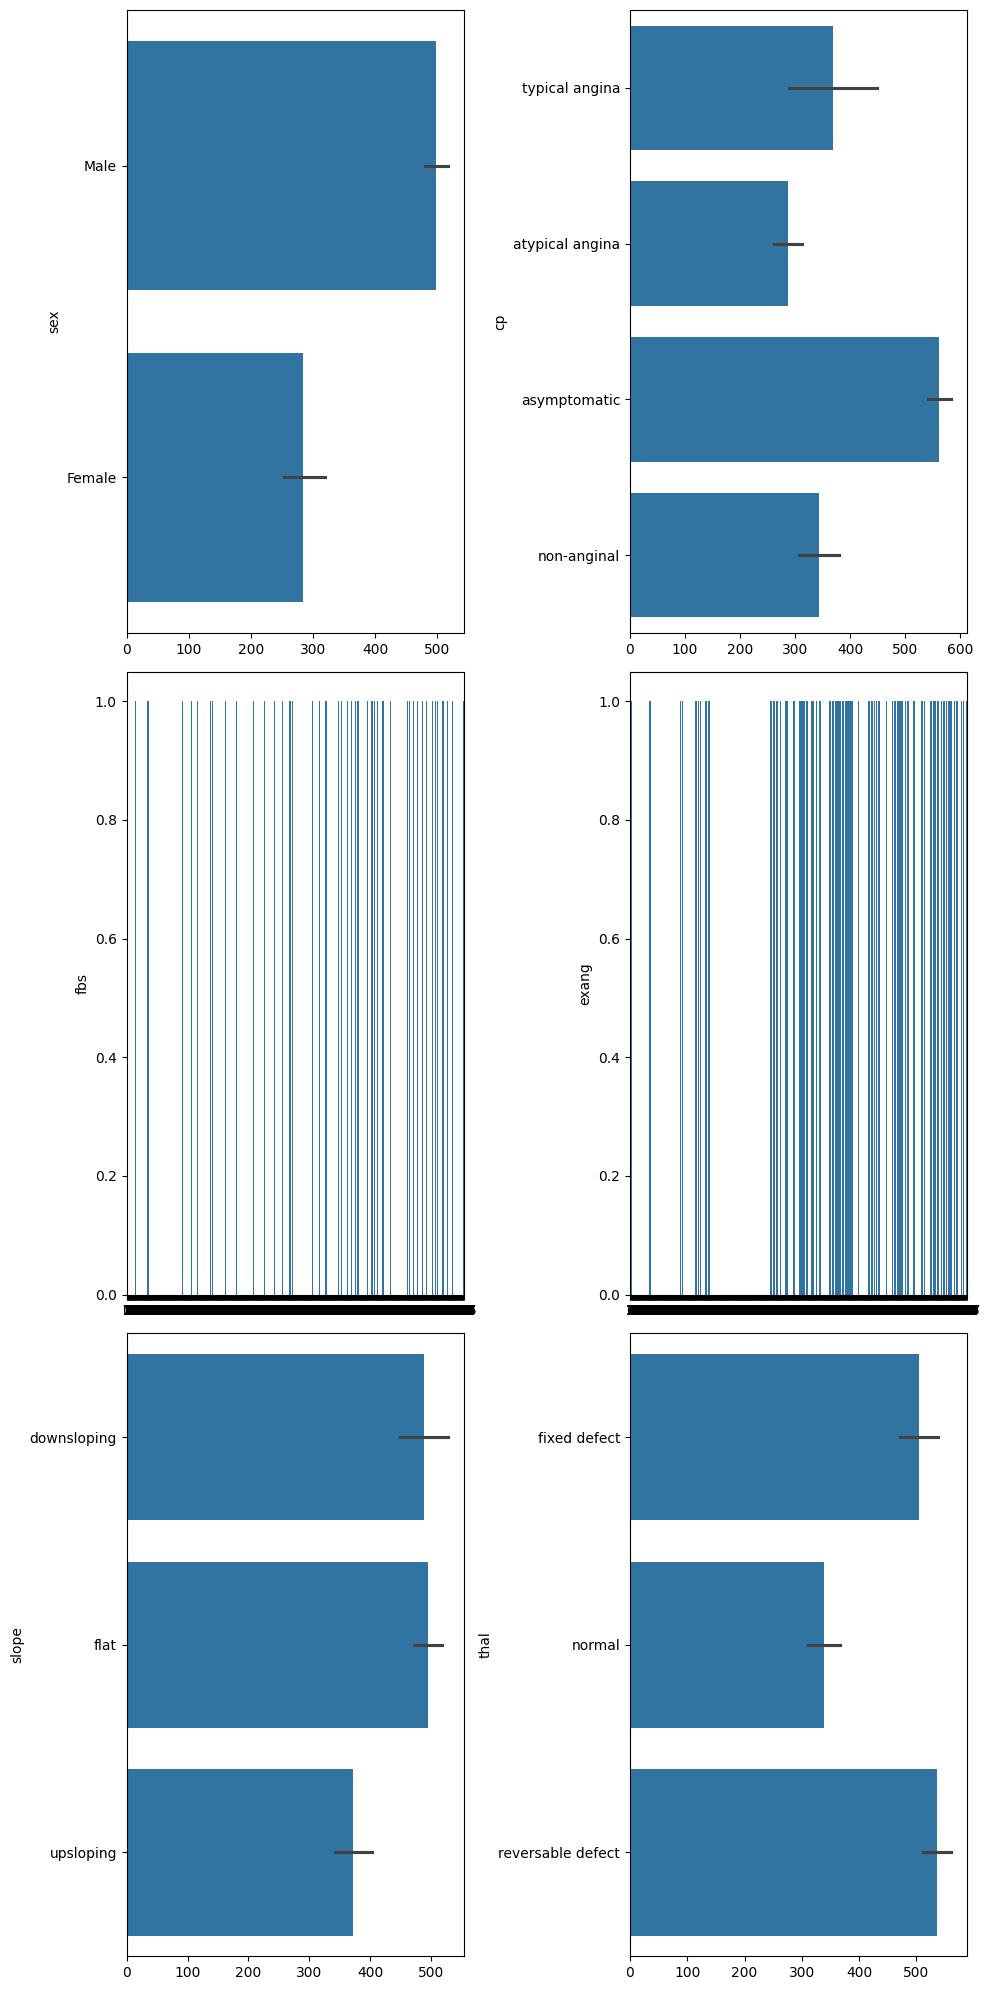

In [27]:
# PLOTTING BARPLOT ==> HERE WE CAN SEE OUTLIERS
fig, ax = plt.subplots(3, 2, figsize=(10, 20))

sns.barplot(heart['sex'], ax = ax[0,0])
sns.barplot(heart['cp'], ax = ax[0,1])
sns.barplot(heart['fbs'], ax = ax[1,0])
sns.barplot(heart['exang'], ax = ax[1,1])
sns.barplot(heart['slope'], ax = ax[2,0])
sns.barplot(heart['thal'], ax = ax[2,1])

plt.tight_layout()

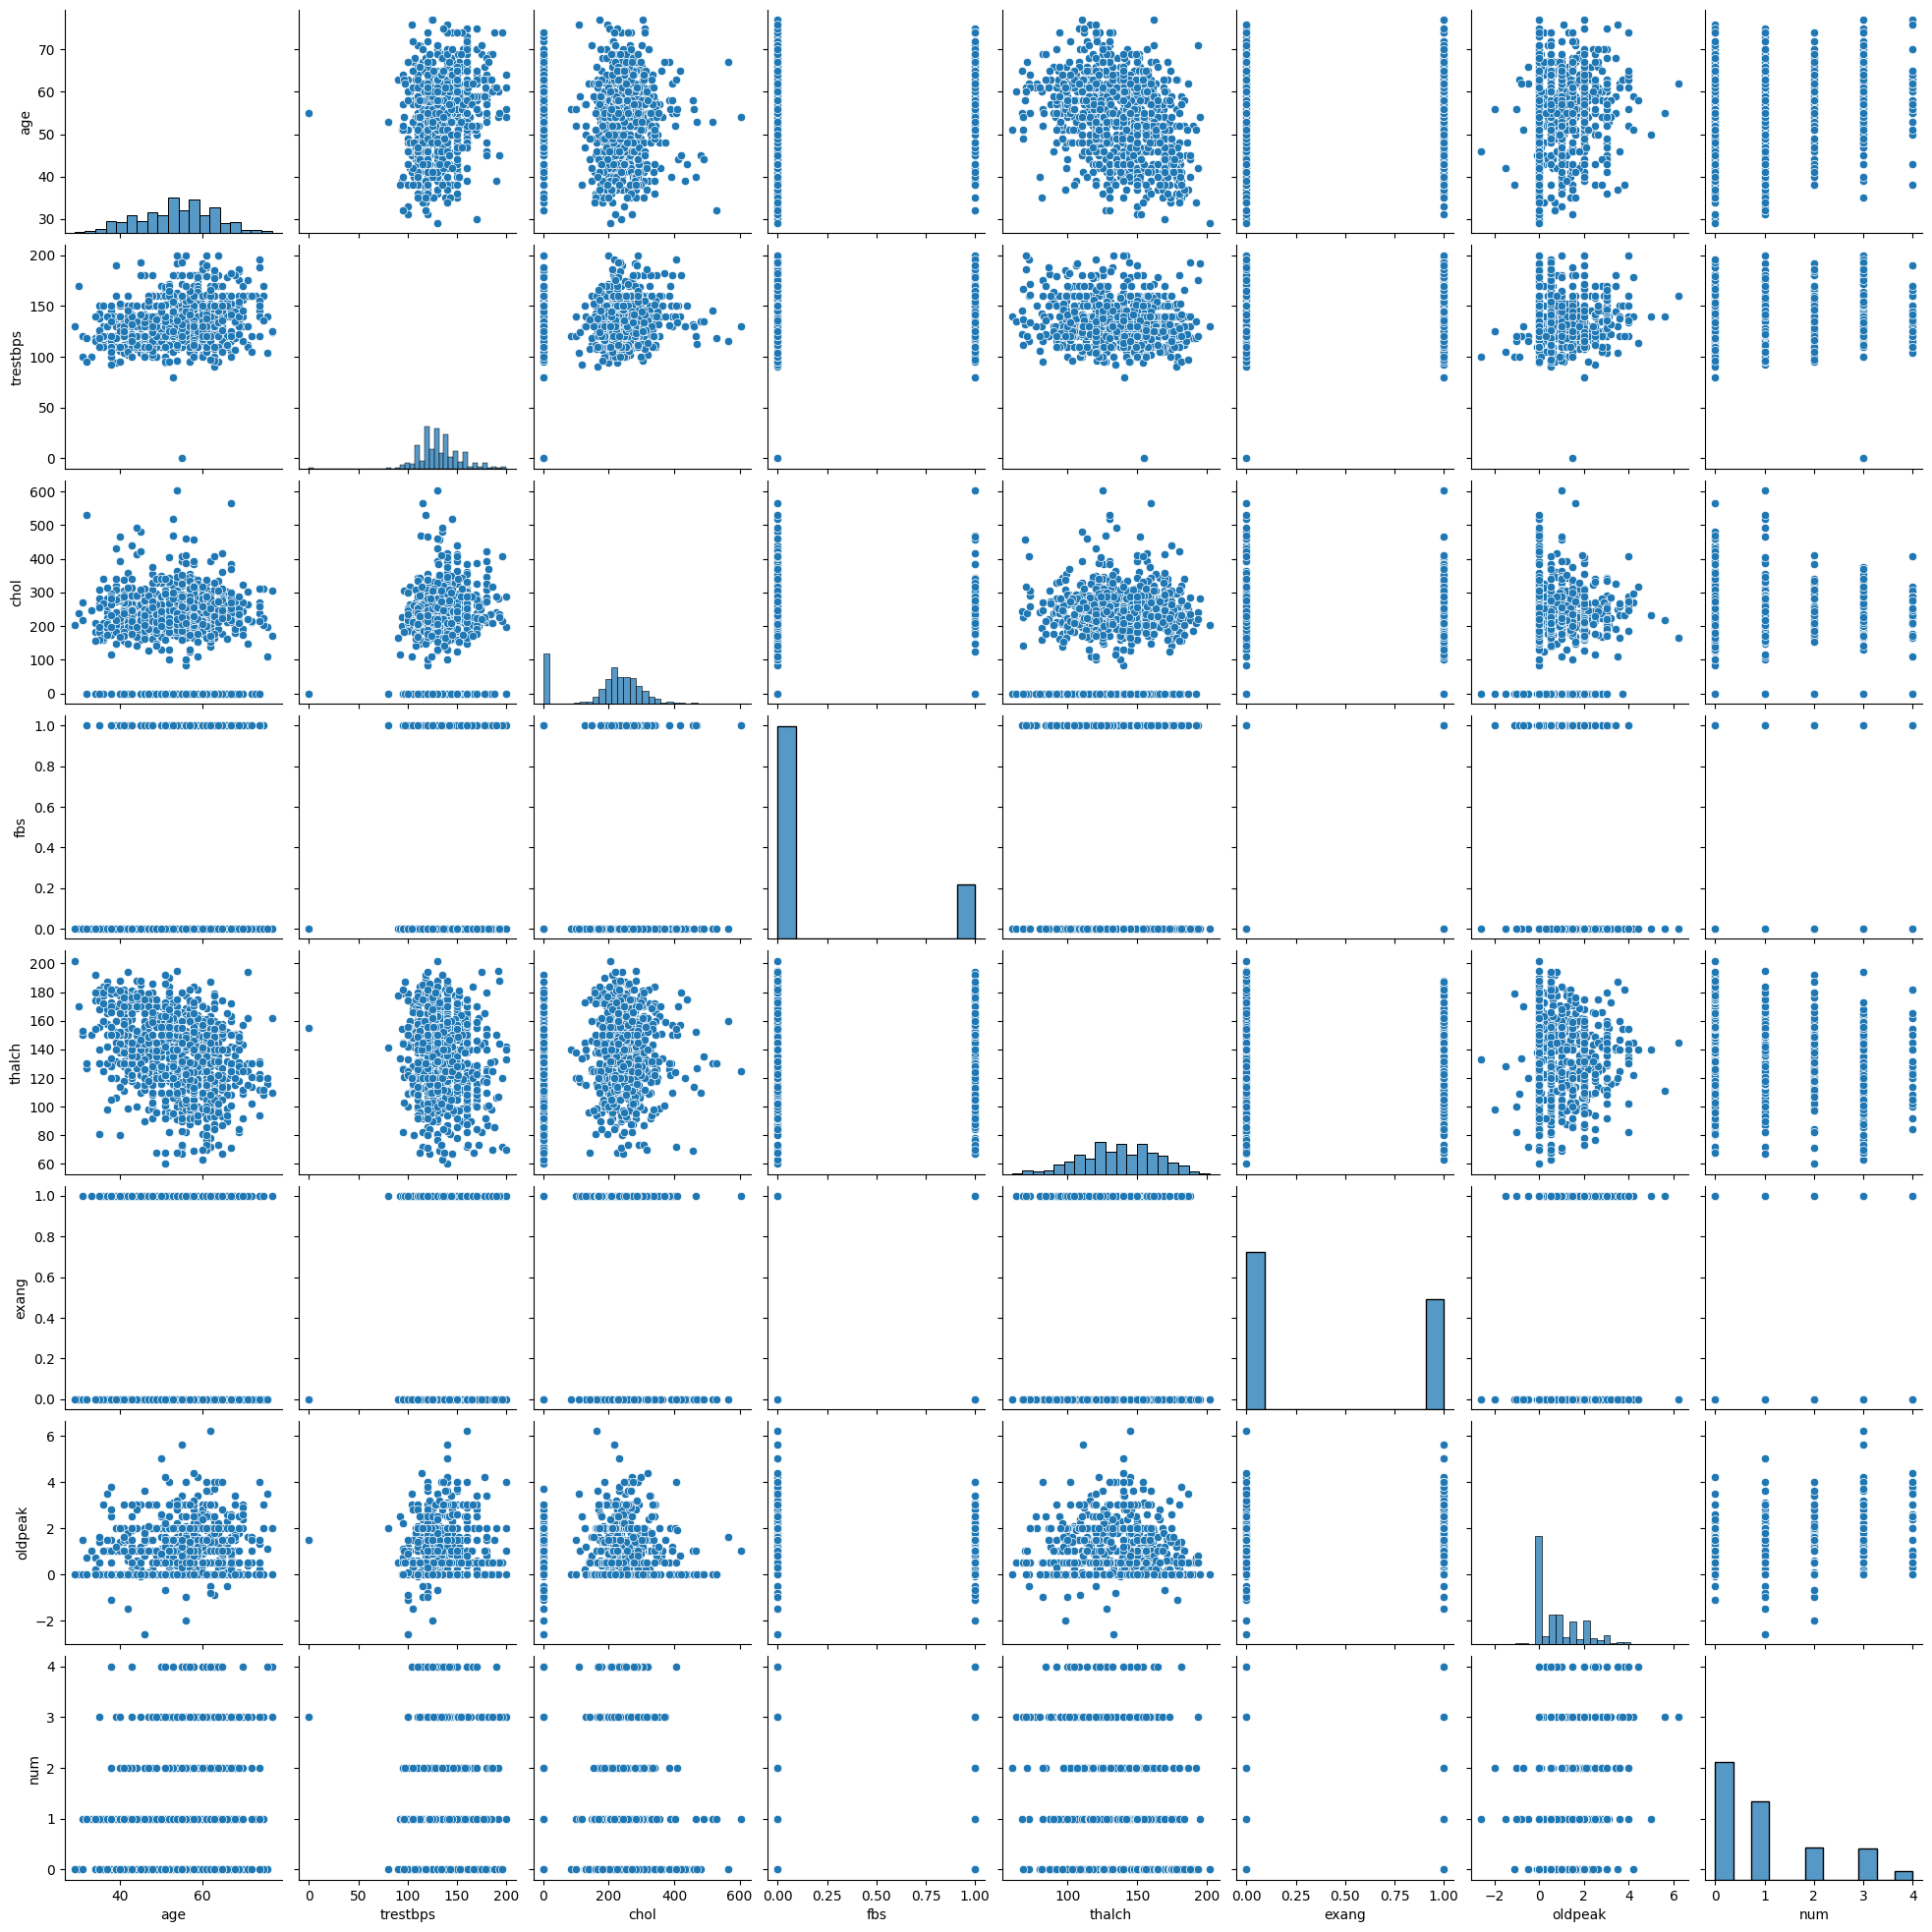

In [28]:
sns.pairplot(data=heart)

In [29]:
# LABEL THE COLUMN='cp'
labelencoder = LabelEncoder()
heart['cp'] = labelencoder.fit_transform(heart.loc[:,['cp']])
heart['restecg'] = labelencoder.fit_transform(heart.loc[:,['restecg']])
heart['thal'] = labelencoder.fit_transform(heart.loc[:,['thal']])
heart['slope'] = labelencoder.fit_transform(heart.loc[:,['slope']])
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,3,145,233,True,0,150,False,2.3,0,0,0
1,41,Male,1,135,203,False,1,132,False,0.0,1,0,0
2,57,Male,0,140,192,False,1,148,False,0.4,1,0,0
3,52,Male,3,118,186,False,0,190,False,0.0,1,0,0
4,57,Male,0,110,201,False,1,126,True,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,0,125,0,False,1,120,False,1.5,2,2,4
904,62,Male,0,166,170,False,2,120,True,3.0,1,2,4
905,56,Male,2,170,0,False,0,123,True,2.5,0,0,4
906,56,Male,2,144,208,True,2,105,True,0.5,0,0,4


In [30]:
heart['cp'].value_counts()

cp
0    495
2    203
1    165
3     45
Name: count, dtype: int64

In [31]:
heart['restecg'].value_counts()

restecg
1    542
0    187
2    179
Name: count, dtype: int64

In [32]:
heart['thal'].value_counts()

thal
2    364
1    348
0    196
Name: count, dtype: int64

In [33]:
heart['slope'].value_counts()

slope
1    453
2    298
0    157
Name: count, dtype: int64

In [34]:
heart=pd.get_dummies(heart,columns=['sex','fbs','exang'],dtype='int')

In [35]:
heart

,age,cp,trestbps,chol,restecg,thalch,oldpeak,slope,thal,num,sex_Female,sex_Male,fbs_False,fbs_True,exang_False,exang_True
0,63,3,145,233,0,150,2.3,0,0,0,0,1,0,1,1,0
1,41,1,135,203,1,132,0.0,1,0,0,0,1,1,0,1,0
2,57,0,140,192,1,148,0.4,1,0,0,0,1,1,0,1,0
3,52,3,118,186,0,190,0.0,1,0,0,0,1,1,0,1,0
4,57,0,110,201,1,126,1.5,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,0,125,0,1,120,1.5,2,2,4,0,1,1,0,1,0
904,62,0,166,170,2,120,3.0,1,2,4,0,1,1,0,0,1
905,56,2,170,0,0,123,2.5,0,0,4,0,1,1,0,0,1
906,56,2,144,208,2,105,0.5,0,0,4,0,1,0,1,0,1


In [59]:
x=heart.drop(['cp'],axis=1)
y=heart[['cp']]
x.head()

,age,trestbps,chol,restecg,thalch,oldpeak,slope,thal,num,sex_Female,sex_Male,fbs_False,fbs_True,exang_False,exang_True
0,63,145,233,0,150,2.3,0,0,0,0,1,0,1,1,0
1,41,135,203,1,132,0.0,1,0,0,0,1,1,0,1,0
2,57,140,192,1,148,0.4,1,0,0,0,1,1,0,1,0
3,52,118,186,0,190,0.0,1,0,0,0,1,1,0,1,0
4,57,110,201,1,126,1.5,1,0,0,0,1,1,0,0,1


In [60]:
y.tail()

,cp
903,0
904,0
905,2
906,2
907,0


In [61]:
#SPLITTING DATA INTO TRAINING AND TESTING DATASET
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [62]:
dt_def = DecisionTreeClassifier()
dt_def.fit(x_train,y_train)
ypred = dt_def.predict(x_test)

In [63]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

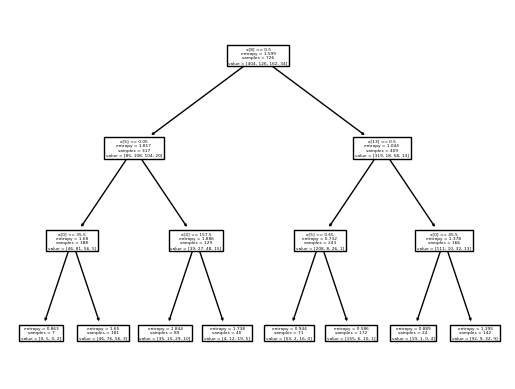

In [64]:
tree.plot_tree(model);

In [65]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68        91
           1       0.38      0.41      0.40        39
           2       0.42      0.39      0.41        41
           3       0.22      0.18      0.20        11

    accuracy                           0.53       182
   macro avg       0.43      0.42      0.42       182
weighted avg       0.53      0.53      0.53       182



In [76]:
print('Training Accuracy of Model is : ' + str(dt_def.score(x_train,y_train)))
print('Testing Accuracy of Model is : ' + str(dt_def.score(x_test, y_test)))

Training Accuracy of Model is : 1.0
Testing Accuracy of Model is : 0.532967032967033


In [67]:
heart.columns

Index(['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalch', 'oldpeak',
       'slope', 'thal', 'num', 'sex_Female', 'sex_Male', 'fbs_False',
       'fbs_True', 'exang_False', 'exang_True'],
      dtype='object')

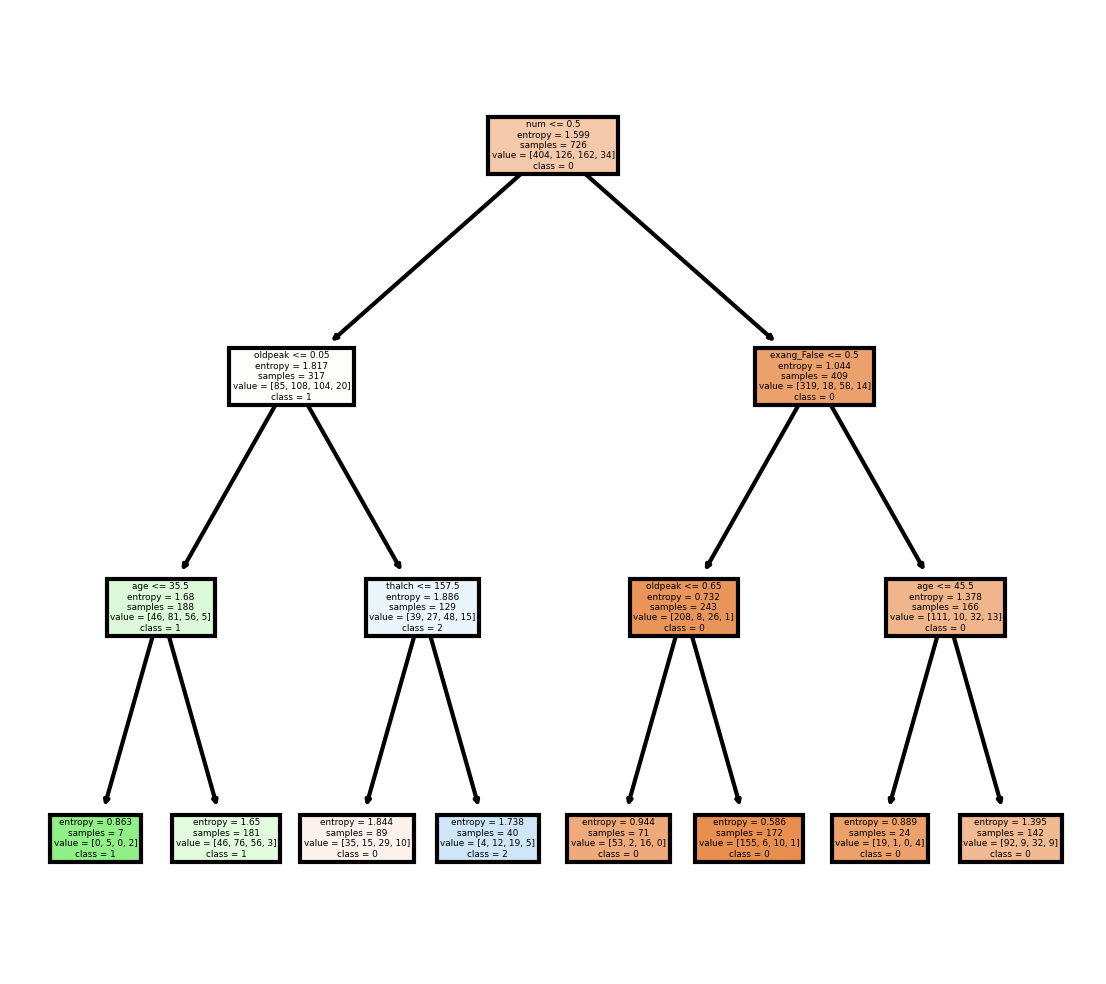

In [68]:
fn=['age', 'trestbps', 'chol', 'restecg', 'thalch', 'oldpeak','slope', 'thal', 'num', 'sex_Female', 'sex_Male', 'fbs_False','fbs_True', 'exang_False', 'exang_True']
cn=['0','1','2','3']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4.5,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

# **CRITERIA = GINI**

In [77]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=20)

In [78]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [79]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [80]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_train)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [81]:
model.score(x_test,y_test)   #Accuracy

0.6263736263736264